In [ ]:
import pandas as pd
imdb1000=pd.read_excel('https://drive.google.com/uc?id=1igeT_0ZyIcYo-LAZ99LtAIj5QEZXrvTw&export=download')
imdb1000

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,9.3,80.0,2343110,"28,341,469"
1,The Godfather,1972,A,175,9.2,100.0,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152,9.0,84.0,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202,9.0,90.0,1129952,"57,300,000"
4,12 Angry Men,1957,U,96,9.0,96.0,689845,"4,360,000"
...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115,7.6,76.0,166544,NaN
996,Giant,1956,G,201,7.6,84.0,34075,NaN
997,From Here to Eternity,1953,Passed,118,7.6,85.0,43374,"30,500,000"
998,Lifeboat,1944,NaN,97,7.6,78.0,26471,NaN


In [ ]:
imdb1000=imdb1000.rename(columns={'Series_Title':'電影片名','Runtime':'影片長度'})

In [ ]:
imdb1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   電影片名           1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    899 non-null    object 
 3   影片長度           1000 non-null   int64  
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   No_of_Votes    1000 non-null   int64  
 7   Gross          831 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


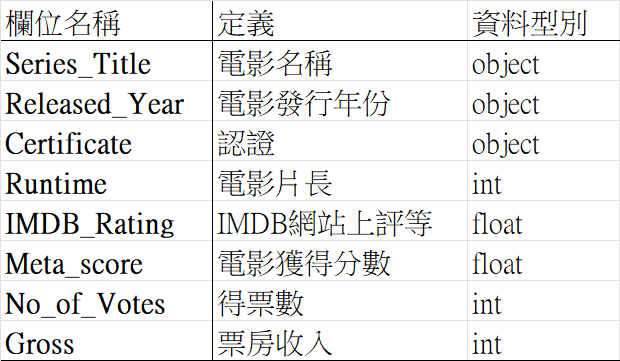

In [ ]:
imdb1000['Released_Year']=imdb1000['Released_Year'].astype(object)
imdb1000['Gross']=imdb1000['Gross'].str.replace(',','')
imdb1000['Gross']=pd.to_numeric(imdb1000['Gross'],errors='coerce')

In [ ]:
imdb_drop=imdb1000.dropna()
imdb_drop['Gross']=imdb_drop['Gross'].astype(int)

<ipython-input-5-b43e9ea1016b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_drop['Gross']=imdb_drop['Gross'].astype(int)


In [ ]:
評等=list()
for i in imdb_drop['IMDB_Rating']:
    if i>=9.0:
        評等.append("A")
    elif i>=8.5:
        評等.append("B")
    elif i>=8.0:
        評等.append("C")
    else:
        評等.append("D")
imdb_drop["評等"]=評等
imdb_drop

<ipython-input-6-382b77d22b23>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_drop["評等"]=評等


,電影片名,Released_Year,Certificate,影片長度,IMDB_Rating,Meta_score,No_of_Votes,Gross,評等
0,The Shawshank Redemption,1994,A,142,9.3,80.0,2343110,28341469,A
1,The Godfather,1972,A,175,9.2,100.0,1620367,134966411,A
2,The Dark Knight,2008,UA,152,9.0,84.0,2303232,534858444,A
3,The Godfather: Part II,1974,A,202,9.0,90.0,1129952,57300000,A
4,12 Angry Men,1957,U,96,9.0,96.0,689845,4360000,A
...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157,7.6,77.0,30144,696690,D
991,Kelly's Heroes,1970,GP,144,7.6,50.0,45338,1378435,D
992,The Jungle Book,1967,U,78,7.6,65.0,166409,141843612,D
994,A Hard Day's Night,1964,U,87,7.6,96.0,40351,13780024,D


In [ ]:
imdb_drop=imdb_drop.set_index('電影片名')

In [ ]:
imdb_numeric=imdb_drop[['影片長度','IMDB_Rating','Meta_score','No_of_Votes','Gross']]

In [ ]:
print('平均數:')
print(imdb_numeric.mean())
print('標準差:')
print(imdb_numeric.std())
print('最大值:')
print(imdb_numeric.max())
print('最小值:')
print(imdb_numeric.min())
print('共變異數矩陣:')
print(imdb_numeric.cov())
print('相關係數矩陣:')
print(imdb_numeric.corr())

平均數:
影片長度           1.237157e+02
IMDB_Rating    7.937115e+00
Meta_score     7.715826e+01
No_of_Votes    3.561348e+05
Gross          7.851359e+07
dtype: float64
標準差:
影片長度           2.588754e+01
IMDB_Rating    2.932778e-01
Meta_score     1.240114e+01
No_of_Votes    3.539011e+05
Gross          1.149780e+08
dtype: float64
最大值:
影片長度                 238.0
IMDB_Rating            9.3
Meta_score           100.0
No_of_Votes      2343110.0
Gross          936662225.0
dtype: float64
最小值:
影片長度              72.0
IMDB_Rating        7.6
Meta_score        28.0
No_of_Votes    25229.0
Gross           1305.0
dtype: float64
共變異數矩陣:
                     影片長度   IMDB_Rating    Meta_score   No_of_Votes  \
影片長度         6.701645e+02  1.960497e+00 -1.835726e+00  1.957448e+06   
IMDB_Rating  1.960497e+00  8.601186e-02  1.021607e+00  6.467677e+04   
Meta_score  -1.835726e+00  1.021607e+00  1.537884e+02  1.305417e+05   
No_of_Votes  1.957448e+06  6.467677e+04  1.305417e+05  1.252460e+11   
Gross        5.026262e+08  

In [ ]:
imdb_rate=imdb_drop['評等']

In [ ]:
imdb_merge=pd.concat([imdb_rate,imdb_numeric],axis=1)

In [ ]:
print('平均數:\n',imdb_merge.groupby(['評等']).mean())
print('個數:\n',imdb_merge['評等'].value_counts())

平均數:
           影片長度  IMDB_Rating  Meta_score   No_of_Votes         Gross
評等                                                                 
A   153.400000     9.100000   90.000000  1.617301e+06  1.519653e+08
B   138.279070     8.611628   81.558140  1.039062e+06  1.269103e+08
C   128.330709     8.124016   79.972441  4.160962e+05  8.114404e+07
D   118.990291     7.737379   74.808252  2.325866e+05  7.094939e+07
個數:
 評等
D    412
C    254
B     43
A      5
Name: count, dtype: int64


#Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

In [ ]:
!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

--2024-05-27 10:23:02--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.107.101, 142.251.107.102, 142.251.107.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-05-27 10:23:02--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.196.132, 2607:f8b0:400c:c36::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.196.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  37.6MB/s    in 0.5s    

2024-05-27 10:23:0

<Axes: title={'center': '認證項目圓餅圖'}>

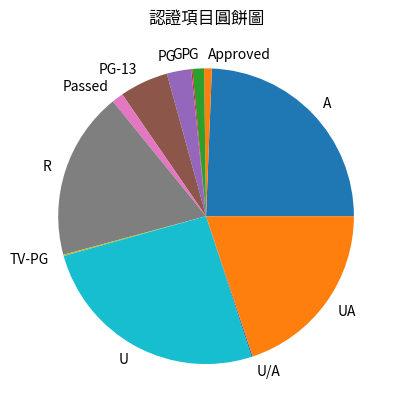

In [ ]:
tab4=pd.pivot_table(imdb_drop, values='Released_Year', index=['Certificate'], aggfunc='count')
tab4=tab4.rename(columns={"Released_Year":""})
tab4.plot.pie(y='',title='認證項目圓餅圖', legend=False)

In [ ]:
imdb_U=imdb_drop.loc[imdb_drop['Certificate']=='U',['Certificate','Meta_score']]

In [ ]:
import sys
!{sys.executable} -m pip install stemgraphic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ef677a2c2cc47fcccea05fb16e885a3e301bdccde59b8dd07775abb0f67e37fc
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


Text(0.5, 1.0, 'Meta_Score Stem-and-Leaf display')

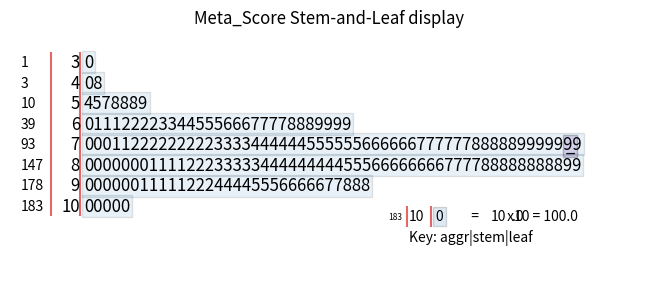

In [ ]:
import stemgraphic
fig, ax = stemgraphic.stem_graphic(imdb_U["Meta_score"],scale=10,asc=False)
ax.set_title("Meta_Score Stem-and-Leaf display")

<Axes: title={'center': 'No_of_Votes'}, xlabel='評等'>

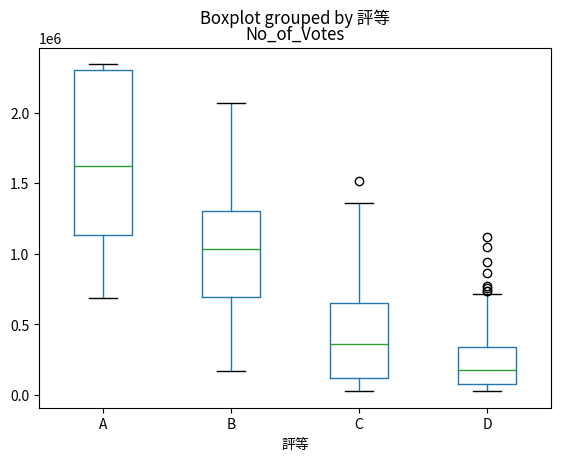

In [ ]:
imdb_drop.boxplot(column='No_of_Votes',by='評等',grid=False)

In [ ]:
Dat1=pd.read_csv("https://mopsfin.twse.com.tw/opendata/t187ap46_O_1.csv")
Dat2=pd.read_csv("https://mopsfin.twse.com.tw/opendata/t187ap46_L_1.csv")
Dat3=pd.concat([Dat1,Dat2],axis=0)
Dat3

,出表日期,報告年度,公司代號,公司名稱,範疇一排放量(噸CO2e),範疇一資料邊界,範疇一取得驗證,範疇二排放量(噸CO2e),範疇二資料邊界,範疇二取得驗證,範疇三排放量(噸CO2e),範疇三資料邊界,範疇三取得驗證,溫室氣體排放密集度(噸CO2e/單位),溫室氣體排放密集度單位,溫室氣體管理之策略、方法、目標
0,1130326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1130326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
